In this notebook, I will compare several binary classification models using a simulated dataset.

The data is simulated using scikit-learn's ```make_classification```. First, the models will be trained and tested on a simple dataset with 2 relevant features. Later, they will be trained and tested on a more complex dataset with both redundant and repeated features without any feature engineering. ```make_classification``` documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

I will try the following scikit-learn classifiers (click on the model name for documentation): [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),
[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html),
[LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html),
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html),
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

I will also add multiplayer perceptrons in Keras and PyTorch and evaluate their performances.

Let's create a dataframe to store accuracies of the classifier for comparison later.

In [1]:
import pandas as pd

accuracy_df = pd.DataFrame(columns = ['Dataset 1', 'Dataset 2', 'Dataset 3', 
                                      'Dataset 4', 'Dataset 5'])

In [2]:
# create simulated data with 2 features
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 1000,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           random_state = 47)

In [3]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 47)

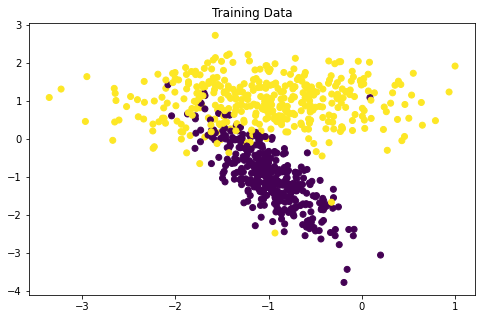

In [4]:
# plot the training data
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [5]:
# import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [6]:
# initialize scikit-learn classifiers with mostly default values
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier()
# initialize Linear SVC with max_iter = 10000 to ensure convergence
linear_svc = LinearSVC(max_iter = 10000)
kn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()


clf_list = [log_reg, dt_clf, linear_svc, kn_clf, rf_clf, gb_clf]

clf_names = ['Logistic Regression', 'Decision Tree Classifier', 'Linear SVC',
            'KNN Classifier', 'Random Forest Classifier', 'Gradient Boosting Classfier']

In [7]:
# define a function that will take in training and testing data,
# and then will fit the classifiers and score their predictions

def scikit_clf_fit_score(x_train, y_train, x_test, y_test, dataset_num):
    
    # loop over each classifier in clf_list, fit, score, add score to accuracy_df
    dataset = f'Dataset {dataset_num}'
    
    for i in range(6):
        clf_list[i].fit(x_train, y_train)
        score = clf_list[i].score(x_test, y_test)
        accuracy_df.loc[clf_names[i], dataset] = score
        print(f'{clf_names[i]}: {score}')

In [8]:
%%time
scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 1)

Logistic Regression: 0.928
Decision Tree Classifier: 0.94
Linear SVC: 0.928
KNN Classifier: 0.952
Random Forest Classifier: 0.948
Gradient Boosting Classfier: 0.952
Wall time: 631 ms


In [9]:
# create a function that fits and evaluates a binary classification model in Keras
from keras.models import Sequential
from keras.layers import Dense

def keras_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # three layer model with ReLU applied to the first two layers
    # and sigmoid to the last one
    model = Sequential([
    Dense(30, input_shape=(x_train.shape[1],), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])
    
    # compile the model using binary crossentropy as the loss function and
    # binary accuracy as the evaluation metric
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    model.fit(x_train, y_train, epochs = n_epochs)
    
    # evaluate using the test data
    results = model.evaluate(x_test, y_test)
    accuracy_df.loc['Keras NN', dataset] = float(f'{results[1]:.3}')
    print(results)

In [10]:
%%time
keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6726 - binary_accuracy: 0.5200
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5412 - binary_accuracy: 0.8347
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4170 - binary_accuracy: 0.8947
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3113 - binary_accuracy: 0.9160
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2517 - binary_accuracy: 0.9280
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2264 - binary_accuracy: 0.9280
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2161 - binary_accuracy: 0.9293
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2108 - binary_accuracy: 0.9280
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2089 - binary_accuracy: 0.9307
Epoch 10/50
24/24 [==============================] - 0s

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# BCELoss will be used for all neural networks
criterion = nn.BCELoss()

In [12]:
# create a binary classification model in PyTorch
# the NN will be the same except for the number of input nodes for all datasets

class TorchBinaryClassifier(nn.Module):
    
    def __init__(self, in_dimension):
        
        super(TorchBinaryClassifier, self).__init__()
        
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(in_dimension, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x

In [13]:
# speficy train and test data
from torch.utils.data import TensorDataset, DataLoader

# set up a function to get dataloaders
def pytorch_loaders(x_train, y_train, x_test, y_test):
    
    X_train_tensor = torch.from_numpy(x_train).float()
    Y_train_tensor = torch.from_numpy(y_train).float().squeeze()

    X_test_tensor = torch.from_numpy(x_test).float()
    Y_test_tensor = torch.from_numpy(y_test).float()

    trainset = TensorDataset(X_train_tensor, Y_train_tensor)
    testset = TensorDataset(X_test_tensor, Y_test_tensor)

    train_loader = DataLoader(trainset)
    test_loader = DataLoader(testset)
    
    return train_loader, test_loader

In [14]:
# set up a training function
def pytorch_train(model, train_loader, n_epochs = 50):
    
    # define the optimizer
    optimizer = optim.Adam(model.parameters())
    
    # set model to train mode
    model.train()
    print('PyTorch model training...')
    
    for epoch in range(n_epochs):
        # zero the running loss for the epoch
        running_loss = 0.0
        
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.view(-1,1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
        print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader.dataset)}')

In [15]:
import numpy as np

# set up a testing function
def pytorch_test(model, test_loader):
    # set model in evaluation mode
    model.eval()
    print('PyTorch model testing...')
    
    test_loss = 0.0
    correct_predictions = 0
    
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target.view(-1,1))
        test_loss += loss.item()
        predicted = np.round(output.detach().numpy().squeeze())
        actual = target.numpy().squeeze()
        
        if predicted == actual:
            correct_predictions += 1
            
    accuracy = correct_predictions/len(test_loader.dataset)
    avg_loss = test_loss/len(test_loader.dataset)
        
    print(f'Loss: {avg_loss}')
    print(f'Accuracy: {accuracy}')
        
    return accuracy

In [16]:
# define a function that will take in the training and testing data
# and combine the previously defined functions to train and test a pytorch nn

def pytorch_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # initialize a neural network
    net = TorchBinaryClassifier(x_train.shape[1])
    
    # get data loaders from the training and testing data
    train_loader, test_loader = pytorch_loaders(x_train, y_train, x_test, y_test)
    
    # train the network
    pytorch_train(net, train_loader)
    
    # add a blank line for a clearer print-out
    print('\n')
    # test the network
    accuracy = pytorch_test(net, test_loader)
    accuracy_df.loc['PyTorch NN', dataset] = accuracy

In [17]:
%%time
pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

PyTorch model training...
Epoch: 1, training loss: 0.32290297719938765
Epoch: 2, training loss: 0.20950264496296708
Epoch: 3, training loss: 0.19952997769796638
Epoch: 4, training loss: 0.19323611823868123
Epoch: 5, training loss: 0.18843870104147936
Epoch: 6, training loss: 0.18445240055239992
Epoch: 7, training loss: 0.1808808706322646
Epoch: 8, training loss: 0.1774843045314968
Epoch: 9, training loss: 0.17683239142020465
Epoch: 10, training loss: 0.17330221476505783
Epoch: 11, training loss: 0.17018092318432657
Epoch: 12, training loss: 0.1675063714106218
Epoch: 13, training loss: 0.16529598364685322
Epoch: 14, training loss: 0.1633695409622669
Epoch: 15, training loss: 0.16162996576464017
Epoch: 16, training loss: 0.16013295912322306
Epoch: 17, training loss: 0.15872061907992369
Epoch: 18, training loss: 0.1580717067537492
Epoch: 19, training loss: 0.15701052411303437
Epoch: 20, training loss: 0.15601708753958882
Epoch: 21, training loss: 0.15534116512587084
Epoch: 22, training lo

Let's look at ```accuracy_df```.

In [18]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,NaN,NaN,NaN,NaN
Decision Tree Classifier,0.94,NaN,NaN,NaN,NaN
Linear SVC,0.928,NaN,NaN,NaN,NaN
KNN Classifier,0.952,NaN,NaN,NaN,NaN
Random Forest Classifier,0.948,NaN,NaN,NaN,NaN
Gradient Boosting Classfier,0.952,NaN,NaN,NaN,NaN
Keras NN,0.956,NaN,NaN,NaN,NaN
PyTorch NN,0.956,NaN,NaN,NaN,NaN


All models achieved above 90% accuracy. The PyTorch MLP required by far the most lines of code and was the slowest.

Now I will test the same models on a dataset with 4 features, 3 of which are informative, and one is a random linear combination of the others.

In [19]:
X_2, Y_2 = make_classification(n_samples = 1000,
                           n_features = 4,
                           n_informative = 3,
                           n_redundant = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [20]:
# display the new classes in terms of the first 3 features using an interactive 3d plot
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_2_train[:,0], X_2_train[:,1], X_2_train[:,2], c = Y_2_train)
plt.title('Training Data')
plt.show()

<IPython.core.display.Javascript object>

In [21]:
%%time
scikit_clf_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

Logistic Regression: 0.928
Decision Tree Classifier: 0.912
Linear SVC: 0.928
KNN Classifier: 0.944
Random Forest Classifier: 0.936
Gradient Boosting Classfier: 0.948
Wall time: 776 ms


In [22]:
%%time
keras_nn_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6118 - binary_accuracy: 0.7773
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4228 - binary_accuracy: 0.9187
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3157 - binary_accuracy: 0.9187
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2522 - binary_accuracy: 0.9280
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2207 - binary_accuracy: 0.9293
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2053 - binary_accuracy: 0.9320
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1961 - binary_accuracy: 0.9293
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1919 - binary_accuracy: 0.9333
Epoch 9/50
24/24 [==============================] - ETA: 0s - loss: 0.2633 - binary_accuracy: 0.968 - 0s 1ms/step - loss: 0.1880 - binary_accuracy: 0.9293
Epoch

In [23]:
%%time
pytorch_nn_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

PyTorch model training...
Epoch: 1, training loss: 0.25901636641533105
Epoch: 2, training loss: 0.189439488619187
Epoch: 3, training loss: 0.18180448081614242
Epoch: 4, training loss: 0.17652214574858316
Epoch: 5, training loss: 0.17209605471772463
Epoch: 6, training loss: 0.16830111982222634
Epoch: 7, training loss: 0.16511767162182356
Epoch: 8, training loss: 0.16178909794522223
Epoch: 9, training loss: 0.1592368978879958
Epoch: 10, training loss: 0.15696169281206343
Epoch: 11, training loss: 0.1544420391015217
Epoch: 12, training loss: 0.15239353234544398
Epoch: 13, training loss: 0.14994611504326266
Epoch: 14, training loss: 0.14823502738463357
Epoch: 15, training loss: 0.1463430079808066
Epoch: 16, training loss: 0.14503073573777242
Epoch: 17, training loss: 0.143007768837793
Epoch: 18, training loss: 0.14191724424328203
Epoch: 19, training loss: 0.14012825385556202
Epoch: 20, training loss: 0.13882207322000112
Epoch: 21, training loss: 0.13725535598080135
Epoch: 22, training loss

In [24]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,NaN,NaN,NaN
Decision Tree Classifier,0.94,0.912,NaN,NaN,NaN
Linear SVC,0.928,0.928,NaN,NaN,NaN
KNN Classifier,0.952,0.944,NaN,NaN,NaN
Random Forest Classifier,0.948,0.936,NaN,NaN,NaN
Gradient Boosting Classfier,0.952,0.948,NaN,NaN,NaN
Keras NN,0.956,0.948,NaN,NaN,NaN
PyTorch NN,0.956,0.944,NaN,NaN,NaN


All models achieved over 90% accuracy again.

For the next dataset, I will use 7 features broken down into 4 informative, 2 redundant (linear combinations of informative features), and 1 repeated (randomly chosen from the previous 6).

In [25]:
X_3, Y_3 = make_classification(n_samples = 1000,
                           n_features = 7,
                           n_informative = 4,
                           n_redundant = 2,
                           n_repeated = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, Y_3, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [26]:
%%time
scikit_clf_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

Logistic Regression: 0.884
Decision Tree Classifier: 0.872
Linear SVC: 0.88
KNN Classifier: 0.9
Random Forest Classifier: 0.896
Gradient Boosting Classfier: 0.896
Wall time: 840 ms


In [27]:
%%time
keras_nn_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6259 - binary_accuracy: 0.6240
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4531 - binary_accuracy: 0.8813
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3411 - binary_accuracy: 0.8987
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2778 - binary_accuracy: 0.9013
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2473 - binary_accuracy: 0.9000
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2321 - binary_accuracy: 0.9040
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2219 - binary_accuracy: 0.9093
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2170 - binary_accuracy: 0.9160
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2134 - binary_accuracy: 0.9173
Epoch 10/50
24/24 [==============================] - 0s

In [28]:
%%time
pytorch_nn_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

PyTorch model training...
Epoch: 1, training loss: 0.3340296701726814
Epoch: 2, training loss: 0.21145514399387563
Epoch: 3, training loss: 0.20214371568588346
Epoch: 4, training loss: 0.19635070464508317
Epoch: 5, training loss: 0.19242608518858956
Epoch: 6, training loss: 0.18911075270701744
Epoch: 7, training loss: 0.18586056719895594
Epoch: 8, training loss: 0.18311354235789865
Epoch: 9, training loss: 0.18085714549444068
Epoch: 10, training loss: 0.178568132504303
Epoch: 11, training loss: 0.17699961898355346
Epoch: 12, training loss: 0.17546631842365967
Epoch: 13, training loss: 0.1740056858229579
Epoch: 14, training loss: 0.17274391604135964
Epoch: 15, training loss: 0.17052873989647196
Epoch: 16, training loss: 0.16904709661965536
Epoch: 17, training loss: 0.16729085991091688
Epoch: 18, training loss: 0.16552905506018534
Epoch: 19, training loss: 0.16458767616924017
Epoch: 20, training loss: 0.16328737942097898
Epoch: 21, training loss: 0.161859698054367
Epoch: 22, training los

In [29]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,0.884,NaN,NaN
Decision Tree Classifier,0.94,0.912,0.872,NaN,NaN
Linear SVC,0.928,0.928,0.88,NaN,NaN
KNN Classifier,0.952,0.944,0.9,NaN,NaN
Random Forest Classifier,0.948,0.936,0.896,NaN,NaN
Gradient Boosting Classfier,0.952,0.948,0.896,NaN,NaN
Keras NN,0.956,0.948,0.892,NaN,NaN
PyTorch NN,0.956,0.944,0.904,NaN,NaN


In [30]:
X_4, Y_4 = make_classification(n_samples = 1000,
                           n_features = 10,
                           n_informative = 5,
                           n_redundant = 3,
                           n_repeated = 2,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4, Y_4, 
                                                            test_size = 0.25,
                                                            random_state = 47)

The next dataset will consist of 10 features with the following breakdown: 5 informative, 3 redundant, 2 repeated.

In [31]:
%%time
scikit_clf_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

Logistic Regression: 0.88
Decision Tree Classifier: 0.936
Linear SVC: 0.88
KNN Classifier: 0.956
Random Forest Classifier: 0.952
Gradient Boosting Classfier: 0.952
Wall time: 1.04 s


In [32]:
keras_nn_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5504 - binary_accuracy: 0.7240
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3805 - binary_accuracy: 0.8733
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3049 - binary_accuracy: 0.8933
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2587 - binary_accuracy: 0.9120
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2296 - binary_accuracy: 0.9213
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2083 - binary_accuracy: 0.9253
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1922 - binary_accuracy: 0.9293
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1822 - binary_accuracy: 0.9333
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1748 - binary_accuracy: 0.9387
Epoch 10/50
24/24 [==============================] - 0s

In [33]:
pytorch_nn_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

PyTorch model training...
Epoch: 1, training loss: 0.33065528413720013
Epoch: 2, training loss: 0.19945872078324306
Epoch: 3, training loss: 0.16019783081318814
Epoch: 4, training loss: 0.14610440635759556
Epoch: 5, training loss: 0.13963594506039373
Epoch: 6, training loss: 0.13511818817904597
Epoch: 7, training loss: 0.130238063289675
Epoch: 8, training loss: 0.12603964939417572
Epoch: 9, training loss: 0.12336893423091463
Epoch: 10, training loss: 0.11943671227672488
Epoch: 11, training loss: 0.11719977374027157
Epoch: 12, training loss: 0.11487907194049746
Epoch: 13, training loss: 0.11156996073674172
Epoch: 14, training loss: 0.10956876446685347
Epoch: 15, training loss: 0.1077793802803406
Epoch: 16, training loss: 0.10474460298596824
Epoch: 17, training loss: 0.10274280461061477
Epoch: 18, training loss: 0.10143728963523796
Epoch: 19, training loss: 0.10036857275016035
Epoch: 20, training loss: 0.09761855851987572
Epoch: 21, training loss: 0.09687595497282013
Epoch: 22, training 

In [34]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,0.884,0.88,NaN
Decision Tree Classifier,0.94,0.912,0.872,0.936,NaN
Linear SVC,0.928,0.928,0.88,0.88,NaN
KNN Classifier,0.952,0.944,0.9,0.956,NaN
Random Forest Classifier,0.948,0.936,0.896,0.952,NaN
Gradient Boosting Classfier,0.952,0.948,0.896,0.952,NaN
Keras NN,0.956,0.948,0.892,0.932,NaN
PyTorch NN,0.956,0.944,0.904,0.944,NaN


In [35]:
X_5, Y_5 = make_classification(n_samples = 1000,
                           n_features = 20,
                           n_informative = 7,
                           n_redundant = 7,
                           n_repeated = 6,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_5_train, X_5_test, Y_5_train, Y_5_test = train_test_split(X_5, Y_5, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [36]:
%%time
scikit_clf_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

Logistic Regression: 0.96
Decision Tree Classifier: 0.928


C:\Users\metal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC: 0.96
KNN Classifier: 0.972
Random Forest Classifier: 0.968
Gradient Boosting Classfier: 0.968
Wall time: 1.51 s


In [37]:
keras_nn_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4976 - binary_accuracy: 0.8053
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2405 - binary_accuracy: 0.9547
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1496 - binary_accuracy: 0.9693
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1082 - binary_accuracy: 0.9733
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0865 - binary_accuracy: 0.9787
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0751 - binary_accuracy: 0.9840
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0671 - binary_accuracy: 0.9853
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0618 - binary_accuracy: 0.9880
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0588 - binary_accuracy: 0.9880
Epoch 10/50
24/24 [==============================] - 0s

In [38]:
pytorch_nn_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

PyTorch model training...
Epoch: 1, training loss: 0.19174342544069442
Epoch: 2, training loss: 0.06640837731038111
Epoch: 3, training loss: 0.056395806650036434
Epoch: 4, training loss: 0.050508737819309125
Epoch: 5, training loss: 0.04617565920469656
Epoch: 6, training loss: 0.042448540183130566
Epoch: 7, training loss: 0.03752376697463101
Epoch: 8, training loss: 0.03497653881741712
Epoch: 9, training loss: 0.032502119648665825
Epoch: 10, training loss: 0.030262583124360656
Epoch: 11, training loss: 0.030453164505113345
Epoch: 12, training loss: 0.04242634697026203
Epoch: 13, training loss: 0.03391105710607529
Epoch: 14, training loss: 0.023795678437654393
Epoch: 15, training loss: 0.02538959820698195
Epoch: 16, training loss: 0.028230792740578107
Epoch: 17, training loss: 0.02326107394852653
Epoch: 18, training loss: 0.029755933977586815
Epoch: 19, training loss: 0.019415858522479502
Epoch: 20, training loss: 0.017580489887116867
Epoch: 21, training loss: 0.017284633799570903
Epoch

In [39]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,0.884,0.88,0.96
Decision Tree Classifier,0.94,0.912,0.872,0.936,0.928
Linear SVC,0.928,0.928,0.88,0.88,0.96
KNN Classifier,0.952,0.944,0.9,0.956,0.972
Random Forest Classifier,0.948,0.936,0.896,0.952,0.968
Gradient Boosting Classfier,0.952,0.948,0.896,0.952,0.968
Keras NN,0.956,0.948,0.892,0.932,0.968
PyTorch NN,0.956,0.944,0.904,0.944,0.98


In [40]:
moon_accuracy_df = pd.DataFrame(columns = ['Dataset 1', 'Dataset 2', 'Dataset 3'])

In [41]:
from sklearn.datasets import make_moons

moon_X, moon_Y = make_moons(1000, noise = 0.1, random_state=47)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(moon_X, moon_Y, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


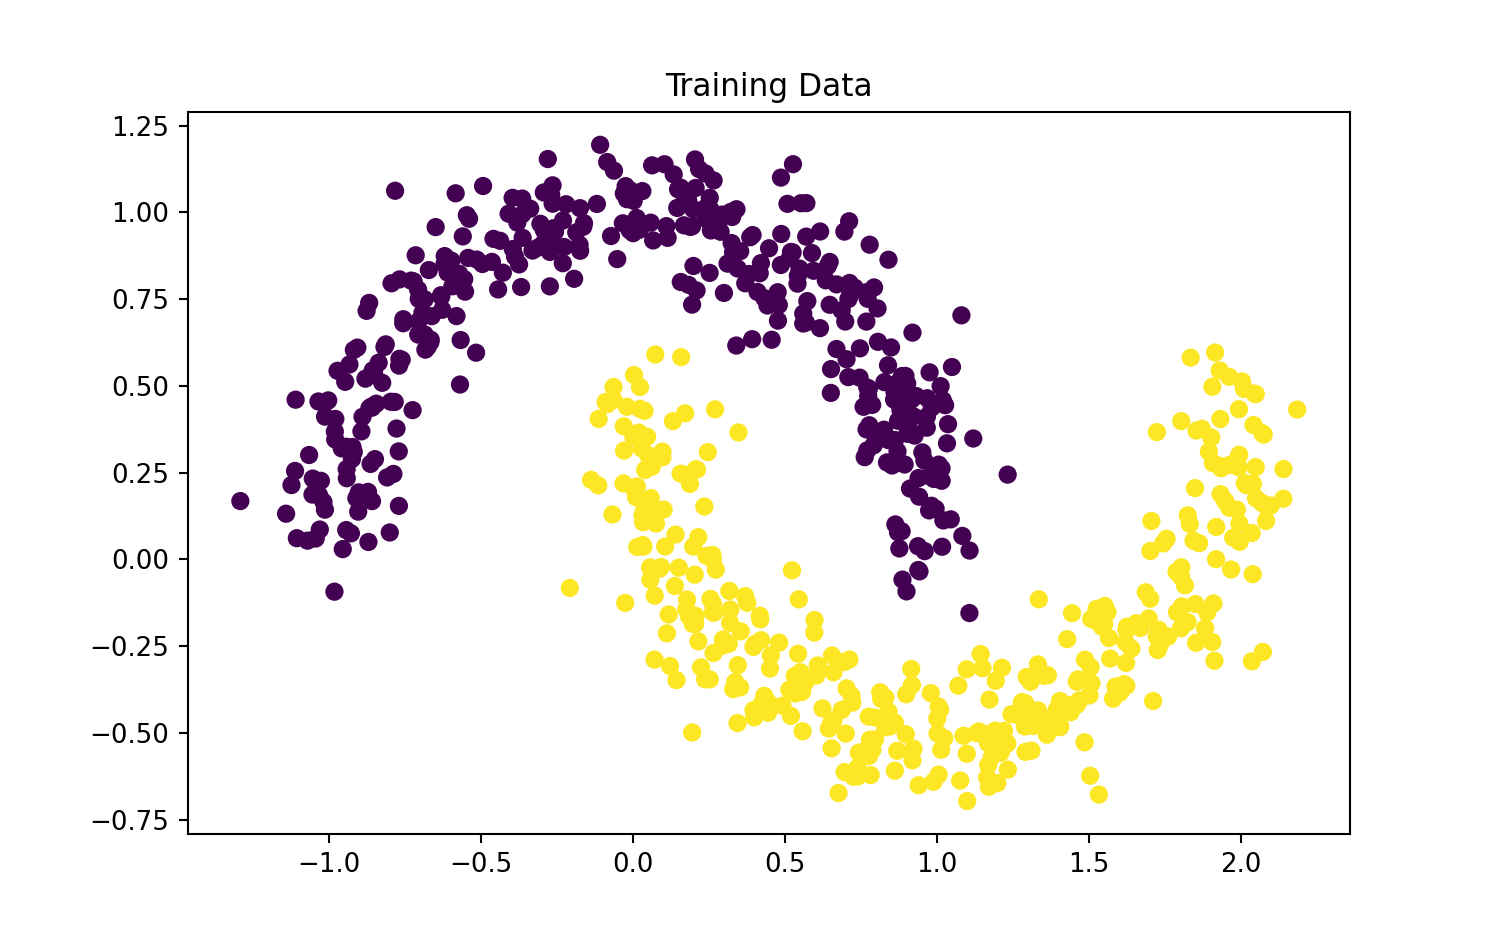

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [44]:
# modify the functions to use the new DataFrame

def moon_scikit_clf_fit_score(x_train, y_train, x_test, y_test, dataset_num):
    
    # loop over each classifier in clf_list, fit, score, add score to accuracy_df
    dataset = f'Dataset {dataset_num}'
    
    for i in range(6):
        clf_list[i].fit(x_train, y_train)
        score = clf_list[i].score(x_test, y_test)
        moon_accuracy_df.loc[clf_names[i], dataset] = score
        print(f'{clf_names[i]}: {score}')

In [45]:
def moon_keras_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # three layer model with ReLU applied to the first two layers
    # and sigmoid to the last one
    model = Sequential([
    Dense(30, input_shape=(x_train.shape[1],), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])
    
    # compile the model using binary crossentropy as the loss function and
    # binary accuracy as the evaluation metric
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    model.fit(x_train, y_train, epochs = n_epochs)
    
    # evaluate using the test data
    results = model.evaluate(x_test, y_test)
    moon_accuracy_df.loc['Keras NN', dataset] = float(f'{results[1]:.3}')
    print(results)

In [46]:
def moon_pytorch_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # initialize a neural network
    net = TorchBinaryClassifier(x_train.shape[1])
    
    # get data loaders from the training and testing data
    train_loader, test_loader = pytorch_loaders(x_train, y_train, x_test, y_test)
    
    # train the network
    pytorch_train(net, train_loader)
    
    # add a blank line for a clearer print-out
    print('\n')
    # test the network
    accuracy = pytorch_test(net, test_loader)
    moon_accuracy_df.loc['PyTorch NN', dataset] = accuracy

In [47]:
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 1)

Logistic Regression: 0.88
Decision Tree Classifier: 0.992
Linear SVC: 0.88
KNN Classifier: 0.996
Random Forest Classifier: 0.988
Gradient Boosting Classfier: 0.992


In [48]:
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6188 - binary_accuracy: 0.7840
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5106 - binary_accuracy: 0.8187
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4198 - binary_accuracy: 0.8200
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3514 - binary_accuracy: 0.8387
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3089 - binary_accuracy: 0.8667
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2828 - binary_accuracy: 0.8720
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2632 - binary_accuracy: 0.8813
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2502 - binary_accuracy: 0.8853
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2394 - binary_accuracy: 0.8893
Epoch 10/50
24/24 [==============================] - 0s

In [49]:
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

PyTorch model training...
Epoch: 1, training loss: 0.35758695457254847
Epoch: 2, training loss: 0.18092153219579873
Epoch: 3, training loss: 0.13151698782949825
Epoch: 4, training loss: 0.08939923641981173
Epoch: 5, training loss: 0.05753078447738981
Epoch: 6, training loss: 0.03687482474008397
Epoch: 7, training loss: 0.024575185988739368
Epoch: 8, training loss: 0.017587210304166965
Epoch: 9, training loss: 0.013316964105357007
Epoch: 10, training loss: 0.010232421801253546
Epoch: 11, training loss: 0.008017173934469667
Epoch: 12, training loss: 0.0064491239360930114
Epoch: 13, training loss: 0.005335602858981304
Epoch: 14, training loss: 0.004528470811380506
Epoch: 15, training loss: 0.003919740765463075
Epoch: 16, training loss: 0.0032893271160247084
Epoch: 17, training loss: 0.0032069200033120826
Epoch: 18, training loss: 0.002956946375948045
Epoch: 19, training loss: 0.0027076079257337634
Epoch: 20, training loss: 0.0024009407486155396
Epoch: 21, training loss: 0.0019977021119470

In [50]:
moon_accuracy_df

,Dataset 1,Dataset 2,Dataset 3
Logistic Regression,0.88,NaN,NaN
Decision Tree Classifier,0.992,NaN,NaN
Linear SVC,0.88,NaN,NaN
KNN Classifier,0.996,NaN,NaN
Random Forest Classifier,0.988,NaN,NaN
Gradient Boosting Classfier,0.992,NaN,NaN
Keras NN,0.992,NaN,NaN
PyTorch NN,0.996,NaN,NaN


In [51]:
moon_X_2, moon_Y_2 = make_moons(1000, noise = 0.3, random_state=47)
X_train, X_test, Y_train, Y_test = train_test_split(moon_X_2, moon_Y_2, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


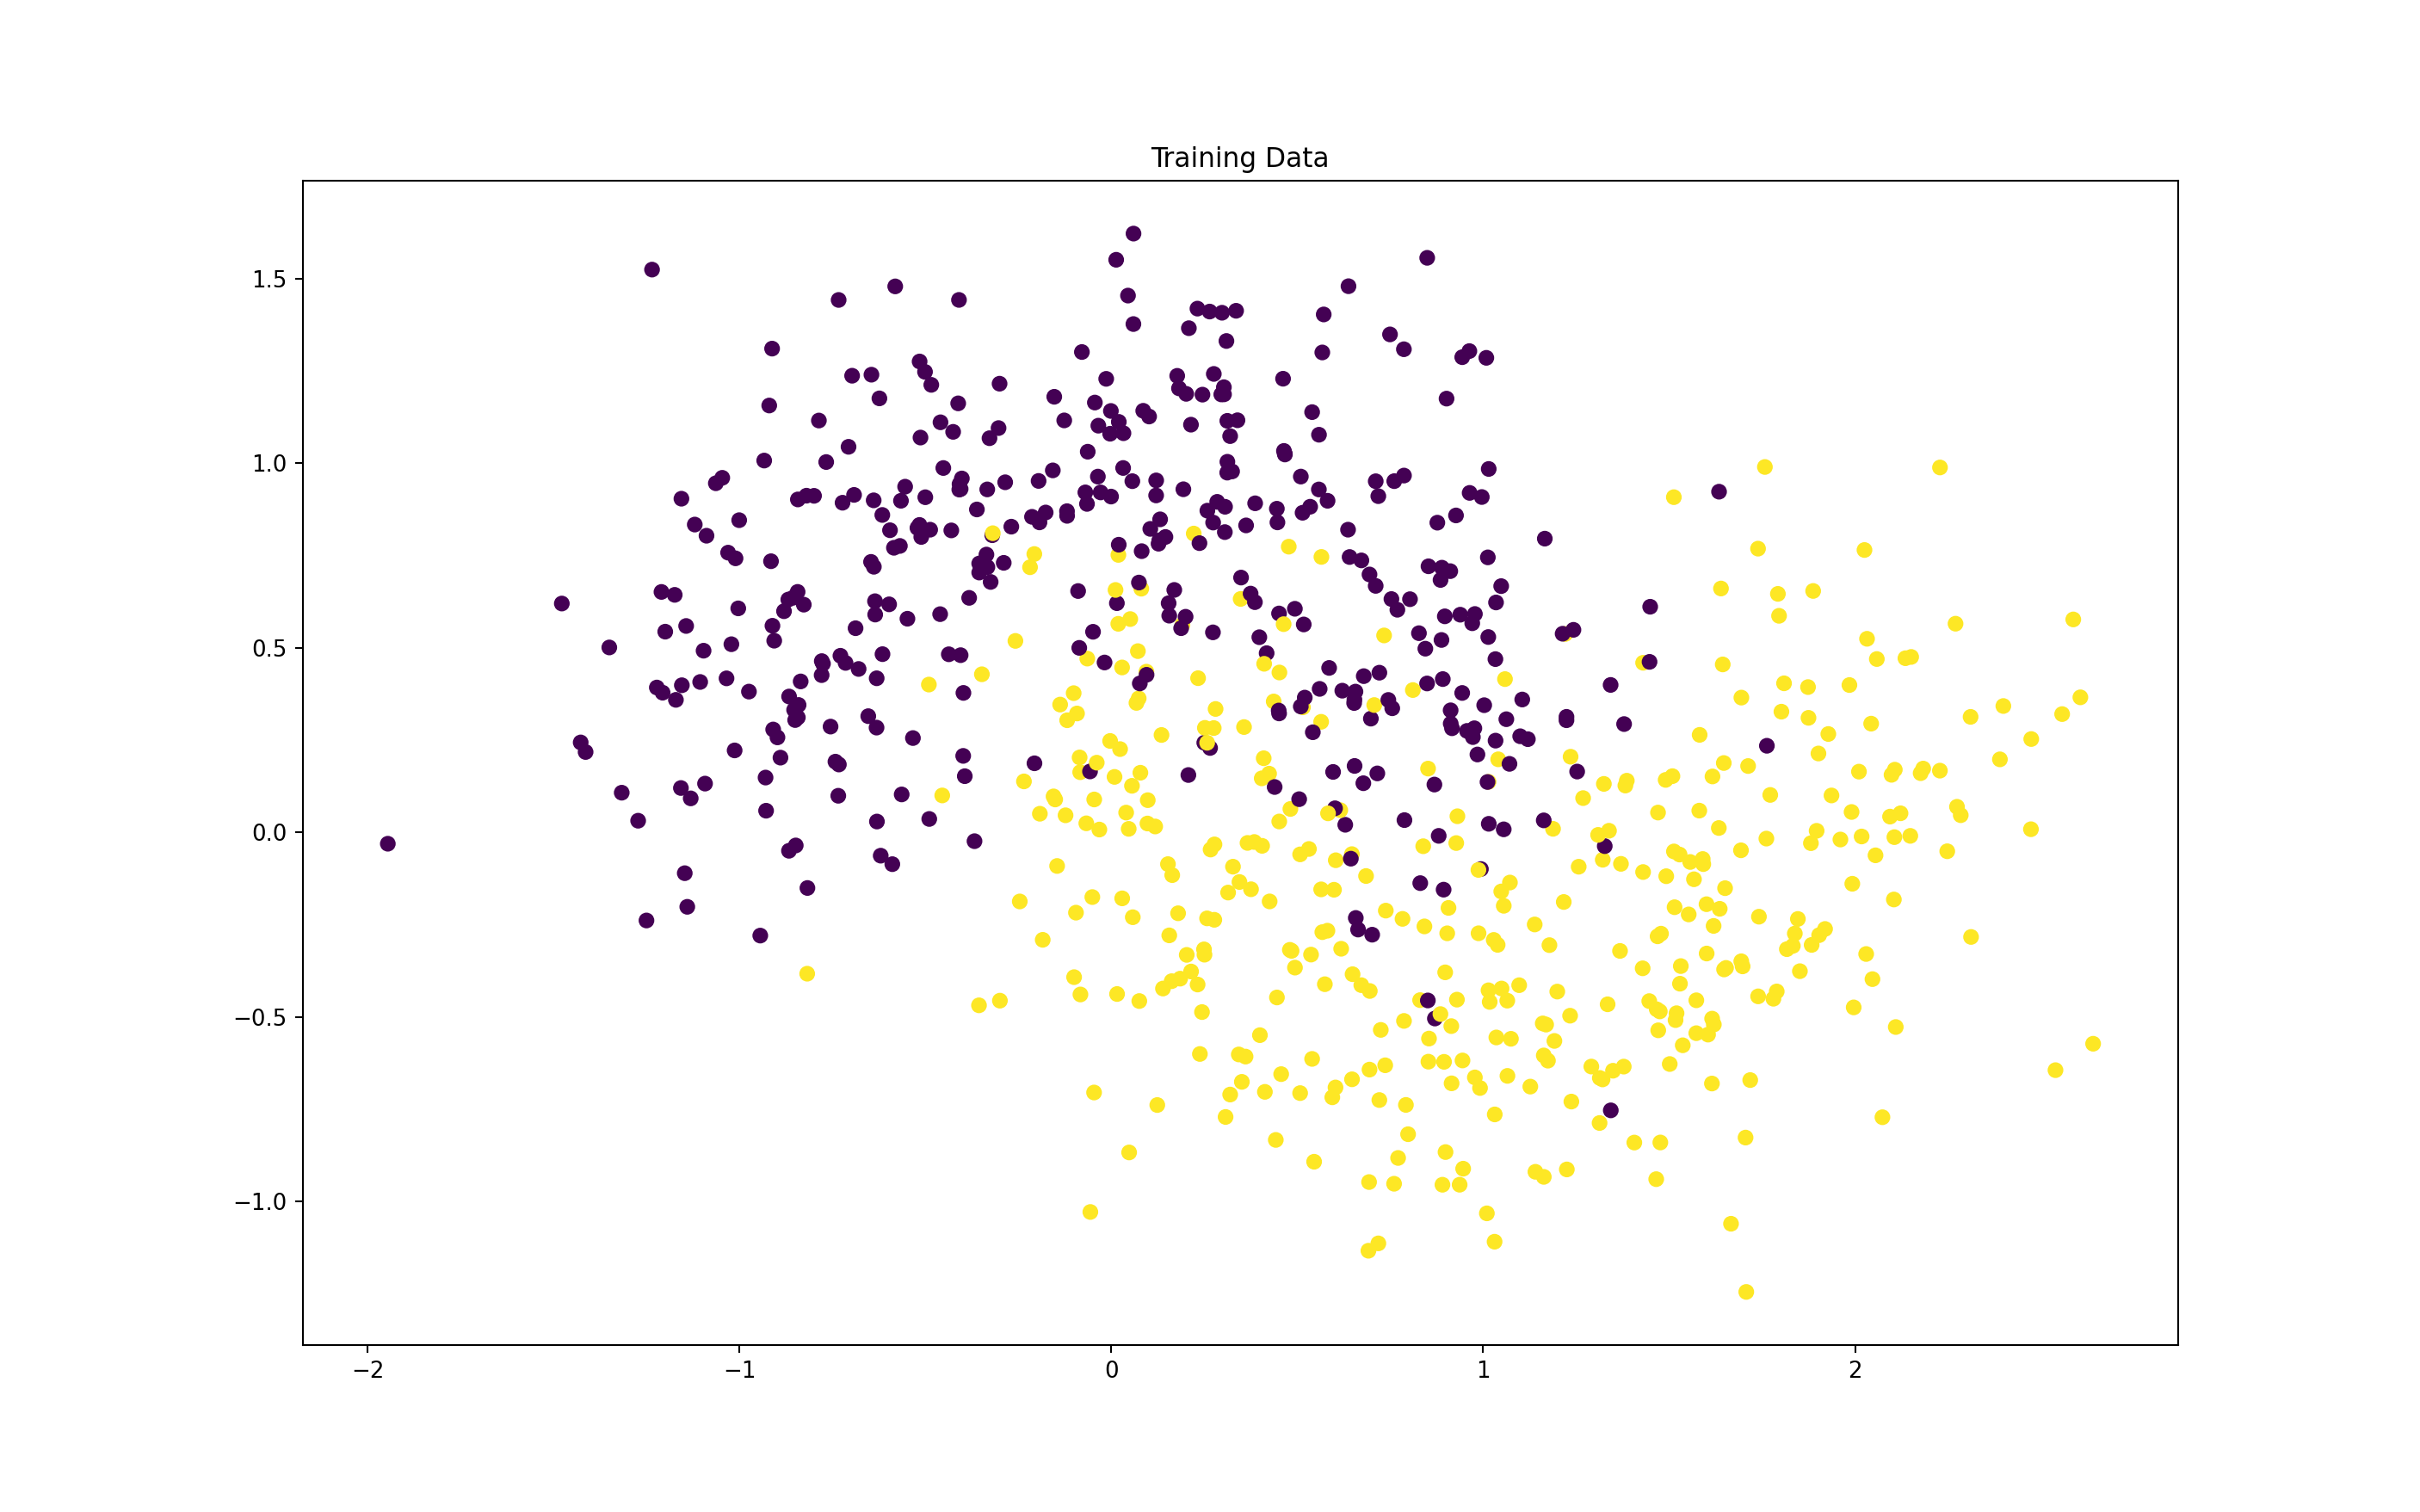

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [53]:
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 2)

Logistic Regression: 0.884
Decision Tree Classifier: 0.864
Linear SVC: 0.884
KNN Classifier: 0.888
Random Forest Classifier: 0.896
Gradient Boosting Classfier: 0.896


In [54]:
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 2)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6308 - binary_accuracy: 0.6680
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5141 - binary_accuracy: 0.8013
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4398 - binary_accuracy: 0.8213
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3892 - binary_accuracy: 0.8347
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3599 - binary_accuracy: 0.8400
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3447 - binary_accuracy: 0.8413
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3390 - binary_accuracy: 0.8440
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3316 - binary_accuracy: 0.8427
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3287 - binary_accuracy: 0.8467
Epoch 10/50
24/24 [==============================] - 0s

In [55]:
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 2)

PyTorch model training...
Epoch: 1, training loss: 0.4341753582327316
Epoch: 2, training loss: 0.3116913083581409
Epoch: 3, training loss: 0.2893942833280501
Epoch: 4, training loss: 0.27056888501076415
Epoch: 5, training loss: 0.25560600107843734
Epoch: 6, training loss: 0.24498866727701898
Epoch: 7, training loss: 0.238174416210888
Epoch: 8, training loss: 0.23391689230850868
Epoch: 9, training loss: 0.23123935899379702
Epoch: 10, training loss: 0.2298272629441674
Epoch: 11, training loss: 0.22828145532543032
Epoch: 12, training loss: 0.227783854981078
Epoch: 13, training loss: 0.22664592785643803
Epoch: 14, training loss: 0.22625274883400928
Epoch: 15, training loss: 0.2260879887561672
Epoch: 16, training loss: 0.22552601581263967
Epoch: 17, training loss: 0.22554929101749077
Epoch: 18, training loss: 0.22494920504750765
Epoch: 19, training loss: 0.22534833357862105
Epoch: 20, training loss: 0.2245151771544497
Epoch: 21, training loss: 0.2242099704563231
Epoch: 22, training loss: 0.

In [56]:
moon_accuracy_df

,Dataset 1,Dataset 2,Dataset 3
Logistic Regression,0.88,0.884,NaN
Decision Tree Classifier,0.992,0.864,NaN
Linear SVC,0.88,0.884,NaN
KNN Classifier,0.996,0.888,NaN
Random Forest Classifier,0.988,0.896,NaN
Gradient Boosting Classfier,0.992,0.896,NaN
Keras NN,0.992,0.904,NaN
PyTorch NN,0.996,0.892,NaN


In [57]:
moon_X_3, moon_Y_3 = make_moons(1000, noise = 0.5, random_state=47)
X_train, X_test, Y_train, Y_test = train_test_split(moon_X_3, moon_Y_3, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


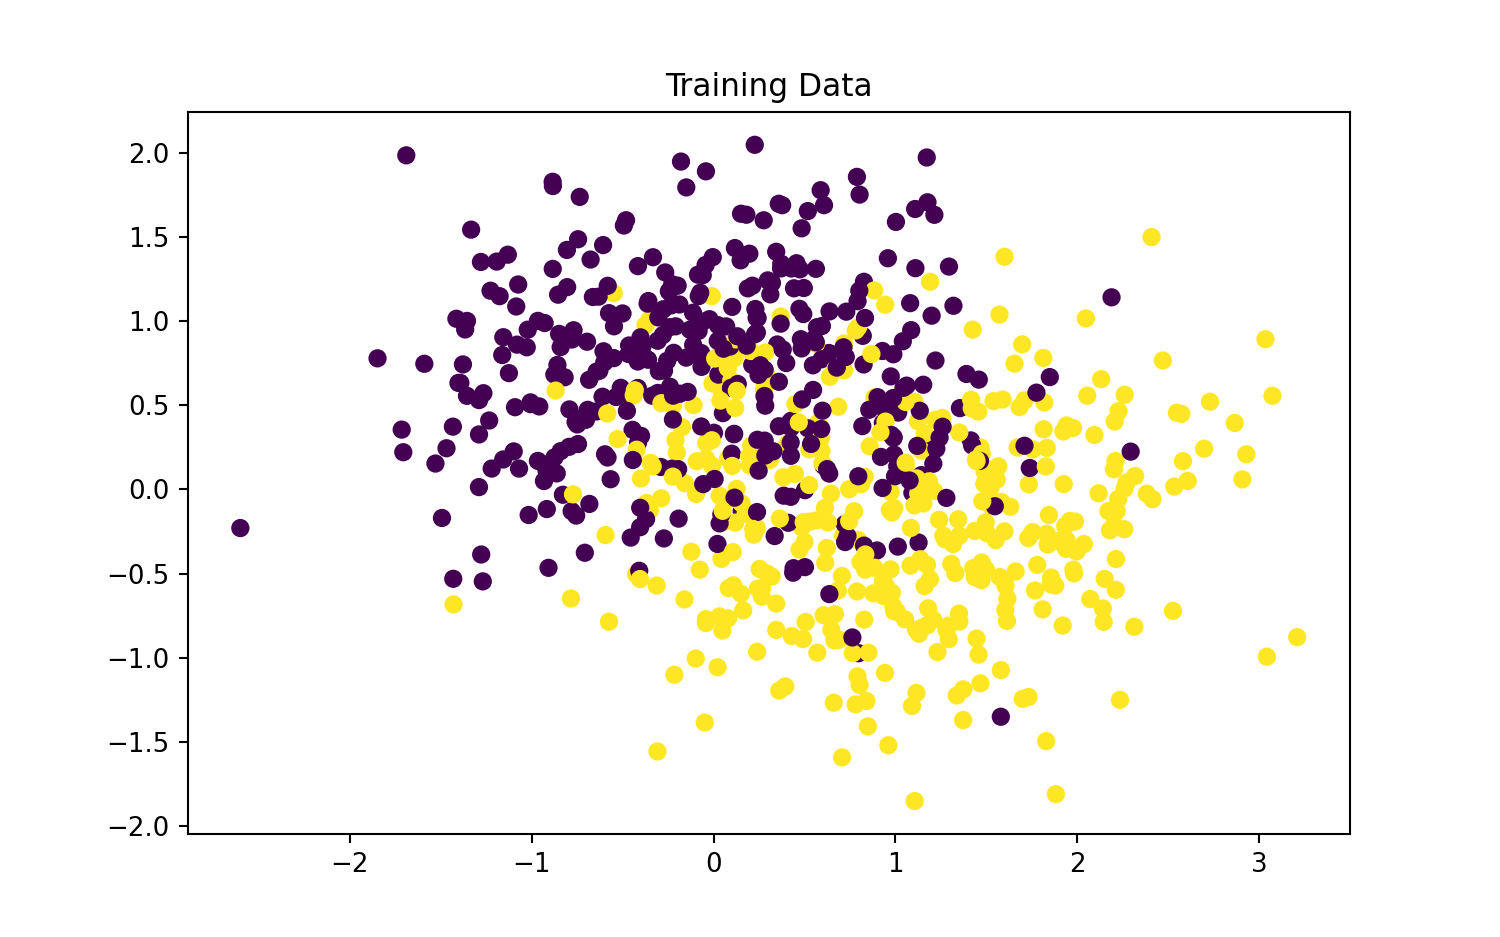

In [58]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [59]:
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 3)

Logistic Regression: 0.852
Decision Tree Classifier: 0.756
Linear SVC: 0.856
KNN Classifier: 0.828
Random Forest Classifier: 0.812
Gradient Boosting Classfier: 0.816


In [60]:
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 3)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.7053 - binary_accuracy: 0.4813
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6210 - binary_accuracy: 0.7947
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5510 - binary_accuracy: 0.7920
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4925 - binary_accuracy: 0.7920
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4553 - binary_accuracy: 0.7920
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4357 - binary_accuracy: 0.7973
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4260 - binary_accuracy: 0.7933
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4232 - binary_accuracy: 0.7933
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4195 - binary_accuracy: 0.7947
Epoch 10/50
24/24 [==============================] - 0s

In [61]:
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 3)

PyTorch model training...
Epoch: 1, training loss: 0.48511411622414985
Epoch: 2, training loss: 0.4152497690465922
Epoch: 3, training loss: 0.4110501501854354
Epoch: 4, training loss: 0.4081071902437834
Epoch: 5, training loss: 0.40594899786942795
Epoch: 6, training loss: 0.40392315791132083
Epoch: 7, training loss: 0.40235780924731324
Epoch: 8, training loss: 0.40081799823705416
Epoch: 9, training loss: 0.39949796068456395
Epoch: 10, training loss: 0.3983160072336662
Epoch: 11, training loss: 0.3972690935571154
Epoch: 12, training loss: 0.39661803179866545
Epoch: 13, training loss: 0.39602971608521814
Epoch: 14, training loss: 0.395407390466947
Epoch: 15, training loss: 0.3948481309233733
Epoch: 16, training loss: 0.3944397208533276
Epoch: 17, training loss: 0.394068002690834
Epoch: 18, training loss: 0.3936429978266836
Epoch: 19, training loss: 0.39321472085073766
Epoch: 20, training loss: 0.3928335631892575
Epoch: 21, training loss: 0.39237228171368166
Epoch: 22, training loss: 0.39

In [62]:
moon_accuracy_df

,Dataset 1,Dataset 2,Dataset 3
Logistic Regression,0.88,0.884,0.852
Decision Tree Classifier,0.992,0.864,0.756
Linear SVC,0.88,0.884,0.856
KNN Classifier,0.996,0.888,0.828
Random Forest Classifier,0.988,0.896,0.812
Gradient Boosting Classfier,0.992,0.896,0.816
Keras NN,0.992,0.904,0.852
PyTorch NN,0.996,0.892,0.832
